Accuracy: 0.9708029197080292
Confusion Matrix:
 [[78  1]
 [ 3 55]]
Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.99      0.97        79
           4       0.98      0.95      0.96        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



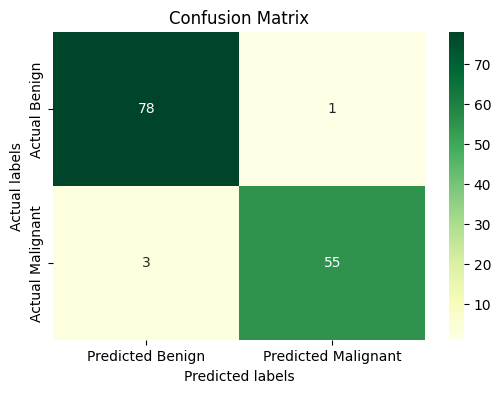

In [ ]:
# @title Support Vector Machine (SVM)
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data Cleaning and Preprocessing
# Replace missing values marked as '?' and drop rows with missing values
cell_df.replace('?', np.nan, inplace=True)
cell_df.dropna(inplace=True)

# Convert 'BareNuc' column to numeric
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Define features and target variable
X = cell_df.drop(['ID', 'Class'], axis=1).values
y = cell_df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Plot the confusion matrix
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Benign', 'Predicted Malignant'], index=['Actual Benign', 'Actual Malignant'])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()


Evaluation Metrics:
Accuracy: 96.35036496350365 %
Confusion Matrix:
 [[78  1]
 [ 4 54]]
Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



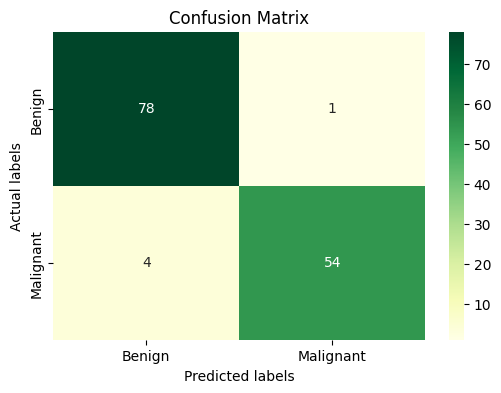

In [ ]:
# @title K-Nearest Neighbors (K-NN)
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data Cleaning
# Replace missing values and convert 'BareNuc' column to integer
cell_df.replace('?', np.nan, inplace=True)
cell_df.dropna(inplace=True)
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Separate features and target variable
X = cell_df.drop(['ID', 'Class'], axis=1)
y = cell_df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn', xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()


Number of data points in each cluster:
Cluster
2    455
4    228
Name: count, dtype: int64

Evaluation Metrics:
Accuracy: 95.46120058565154 %
Confusion Matrix:
[[434  10]
 [ 21 218]]
Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.98      0.97       444
           4       0.96      0.91      0.93       239

    accuracy                           0.95       683
   macro avg       0.95      0.94      0.95       683
weighted avg       0.95      0.95      0.95       683



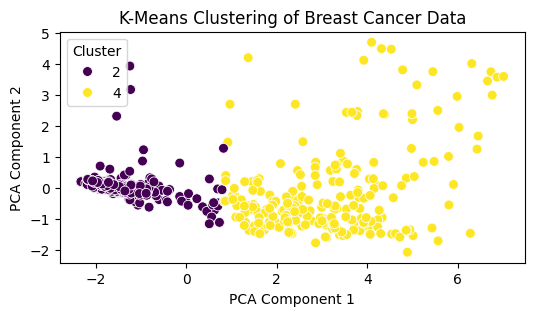

In [ ]:
# @title K-Means Clustering
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data cleaning: Drop rows with missing values in 'BareNuc'
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Feature selection
X = cell_df.iloc[:, 1:-1].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with explicit value for n_init
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
cell_df['Cluster'] = clusters

# Map clusters to class labels based on majority class in each cluster
cluster_labels = {0: 2, 1: 4} if cell_df[cell_df['Cluster'] == 0]['Class'].mode()[0] == 2 else {0: 4, 1: 2}
cell_df['Cluster'] = cell_df['Cluster'].map(cluster_labels)

# Evaluation Metrics
y_true = cell_df['Class']
y_pred = cell_df['Cluster']

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)

# Print the required output
print("Number of data points in each cluster:")
print(cell_df['Cluster'].value_counts())

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:\n", report)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(6, 3))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cell_df['Cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering of Breast Cancer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()